In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [17]:
df_intermediate_2 = pd.read_csv('./data/02_intermediate/df_intermediate_2.csv')

df_intermediate_2.head()

,date,home_team,away_team,home_team_score,away_team_score,winner
0,1993-11-17,Argentina,Australia,1,0,Argentina
1,1994-04-20,Argentina,Morocco,3,1,Argentina
2,1994-05-26,Australia,France,0,1,France
3,1994-05-29,Japan,France,1,4,France
4,1995-01-08,Japan,Argentina,1,5,Argentina


In [18]:
df_intermediate_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             88 non-null     object
 1   home_team        88 non-null     object
 2   away_team        88 non-null     object
 3   home_team_score  88 non-null     int64 
 4   away_team_score  88 non-null     int64 
 5   winner           88 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.2+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_15708\434203416.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


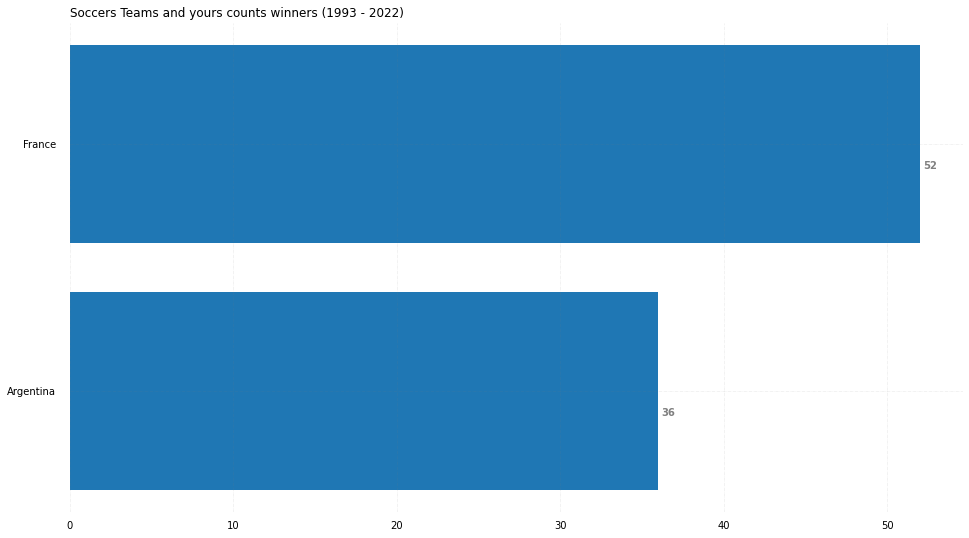

In [19]:
team_name = df_intermediate_2.winner.value_counts().index
winner_count = df_intermediate_2.winner.value_counts().values

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(team_name, winner_count)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Soccers Teams and yours counts winners (1993 - 2022)',
             loc ='left', )
 
# Show Plot
plt.show()

In [20]:
# adding strongest percentage column based on round of semifinal
winners_percent = (df_intermediate_2.winner.value_counts()/df_intermediate_2.shape[0])*100

df_model_input = pd.read_csv('./data/03_model_input/df_model_input_2.csv')

teams=['Argentina','France']
df_model_input = df_model_input[df_model_input['teams'].isin(teams)]

df_model_input

,teams,percent_winners,percent_winners_8,percent_winners_4,percent_winners_2
0,France,1.246294,12.149533,17.808219,42.975207
1,Argentina,1.163940,8.411215,12.328767,29.752066


In [21]:
# adding column of percentage of the strongest based on the classified for final
winners_percent_index = list(winners_percent.index)
winners_percent_values = list(winners_percent.values)

for i in range(len(winners_percent_index)):
    df_model_input.loc[df_model_input.teams == winners_percent_index[i], 'percent_winners_final'] = winners_percent_values[i]

df_model_input

,teams,percent_winners,percent_winners_8,percent_winners_4,percent_winners_2,percent_winners_final
0,France,1.246294,12.149533,17.808219,42.975207,59.090909
1,Argentina,1.163940,8.411215,12.328767,29.752066,40.909091


In [22]:
outname = 'df_model_input_final.csv'

outdir = './data/03_model_input'

if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir,outname)

df_model_input.to_csv(fullname, index=False)

In [23]:
# final games
teams_4 = [['Argentina','France']]

In [24]:
# plotting percentage of teams
for i in range(len(teams_4)):
    df_isin = df_model_input.copy()

    print(f'{teams_4[i][0]} x {teams_4[i][1]}')
    df_isin=df_isin[df_isin['teams'].isin(teams_4[i])]
    display(df_isin)

Argentina x France


,teams,percent_winners,percent_winners_8,percent_winners_4,percent_winners_2,percent_winners_final
0,France,1.246294,12.149533,17.808219,42.975207,59.090909
1,Argentina,1.163940,8.411215,12.328767,29.752066,40.909091
